In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib

import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)                                                                                                                               
colors = bmap.mpl_colors 

def set_visualization_rcs():
    matplotlib.rc('font', family='serif', size=16)
    matplotlib.rc('text.latex', preamble=[r'\usepackage{times,mathptmx}'])
    matplotlib.rc('text', usetex=True)
    matplotlib.rc('legend', fontsize=16)
    matplotlib.rc('figure', figsize=(9.99, 6))
    matplotlib.rc('axes', linewidth=1.5)
    matplotlib.rc('lines', linewidth=1.5)
    params = {'mathtext.default': 'regular' }          
    matplotlib.rcParams.update(params)
    
def set_paper_rcs():
    matplotlib.rc('font', family='serif', size=9)
    matplotlib.rc('text.latex', preamble=[r'\usepackage{times,mathptmx}'])
    matplotlib.rc('text', usetex=True)
    matplotlib.rc('legend', fontsize=8)
    matplotlib.rc('figure', figsize=(3.33, 1.66))
    matplotlib.rc('axes', linewidth=0.5)
    matplotlib.rc('lines', linewidth=0.5)
    params = {'mathtext.default': 'regular' }          
    matplotlib.rcParams.update(params)

#set_visualization_rcs()
set_paper_rcs()
#sns.set_style("white")

<ipython-input-1-59a7ccf8eeb8>:27: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex', preamble=[r'\usepackage{times,mathptmx}'])


In [61]:
all_bin_data = pd.read_pickle("confounding_variables_data.pl")

In [62]:
all_bin_data

,group,value,type
0,suburb,0.067202,random
1,downtown,0.000000,random
2,highway,0.000000,random
3,raining,0.537002,random
4,turning,0.306069,random
...,...,...,...
0,suburb,0.019606,env
1,downtown,0.775882,env
2,highway,0.347491,env
3,raining,0.792793,env


## Old plot

In [63]:
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)
colors = bmap.mpl_colors

width = 0.35
#all_bin_data = all_bin_data[(all_bin_data.group != 'suburb') & (all_bin_data.group != 'raining')]
groups = [group for group, _ in all_bin_data.groupby(["group"])]
x = np.arange(len(groups))

random_bin_scores_deltas = np.array([list(rows[rows["type"] == "random"]["value"]) for _, rows in all_bin_data.groupby(["group"])])
bin_scores_deltas = np.array([list(rows[rows["type"] == "env"]["value"]) for _, rows in all_bin_data.groupby(["group"])])

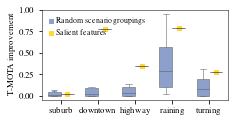

In [69]:
colors = [bmap.mpl_colors[2], bmap.mpl_colors[5]]
ax = sns.boxplot(data=all_bin_data, x="group", y="value", hue="type", width=0.7, saturation=1, showfliers=False, whis=(15,85), palette=colors)
sns.pointplot(ax=ax, data=all_bin_data, x="group", y="value", hue="type", join=False, linewidth=1, dodge=0.36, markers=["s", "s"], ci=None, scale=1.5, palette=colors)
handles, _ = ax.get_legend_handles_labels() 
plt.legend(handles=handles[2:], labels=["Random scenario groupings", "Salient features"], frameon=False, handlelength=0.5, handletextpad=0.3)
#plt.xticks([0, 1, 2], ['City', 'Highway', 'Turning'])
plt.xlabel("")
plt.ylabel("T-MOTA improvement")
plt.savefig('confounding-env-boxplot.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

In [51]:
plt.bar(x + width/2, np.mean(random_bin_scores_deltas, axis=1), width, label="Random scenario groupings", yerr=np.std(random_bin_scores_deltas, axis=1), color=colors[2])
plt.bar(x - width/2, bin_scores_deltas.reshape(-1), width, label="Salient features", color=colors[3])

#plt.xticks(x, labels=groups)
plt.xticks(x, labels=["City", "Highway", "Turning"])
#plt.xlabel("Environment")
plt.ylabel("T-MOTA improvement")
plt.legend(frameon=False)
plt.savefig('confounding-env.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

IndexError: list index out of range

## New plot?

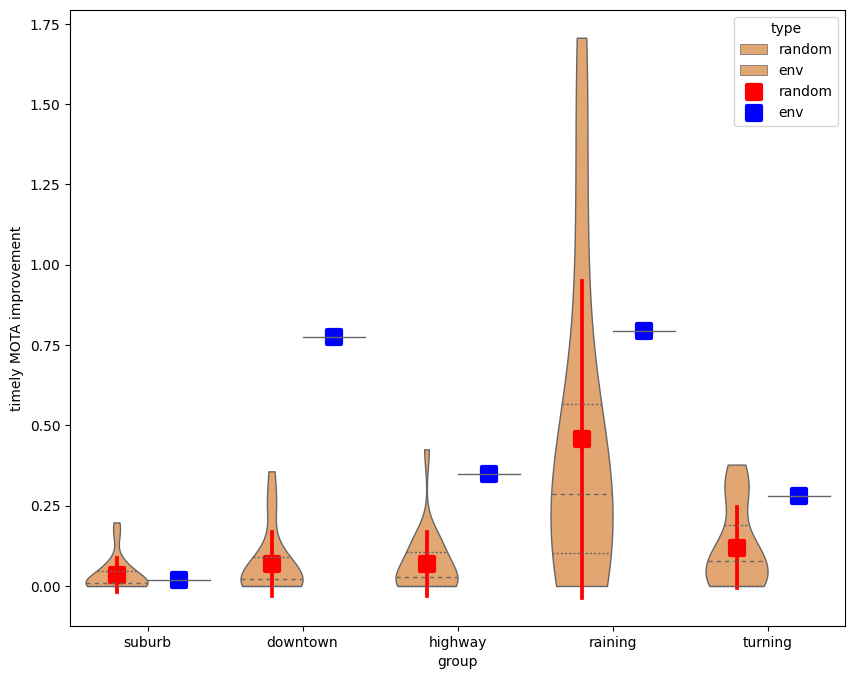

In [31]:
# random_bin_data = pd.DataFrame([{"group": list(labels)[i%5], "value": item} for i, item in enumerate(random_bin_scores_deltas.reshape(-1))])
# env_bin_data = pd.DataFrame({"group": list(labels), "value": bin_scores_deltas})

global_fontsize = 20
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# params = {'legend.fontsize': global_fontsize,
#          'axes.labelsize': global_fontsize,
#          'xtick.labelsize': global_fontsize,
#          'ytick.labelsize': global_fontsize,
#          'font.family': 'sans-serif',
#          'font.serif': ['Helvetica'],
# #           'font.weight': 'bold',
# #           'axes.labelweight': 'bold'
#  }
# plt.rcParams.update(params)

fig, (ax) = plt.subplots(1, 1, figsize=(10, 8))
sns.violinplot(ax=ax, data=all_bin_data, hue="type", x="group", y="value", cut=0, inner="quartile", dodge=0.4, split=False, linewidth=1, palette=["sandybrown"], label="Random")
sns.pointplot(ax=ax, data=all_bin_data, hue="type", x="group", y="value", join=False, linewidth=1, dodge=0.4, markers=["s", "s"], scale=1.5, ci="sd", palette=["red", "blue"])
# sns.pointplot(ax=ax, data=env_bin_data, x="group", y="value", join=False, linewidth=1, dodge=0.4, markers="x", scale=2, palette=["blue"], label="Environment features")

# ax.set_xticks([0, 1, 3, 6, 10])
# ax.set_xticklabels(list(labels))
plt.ylabel("T-MOTA improvement")
fig.show()